In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
train_images.shape

(50000, 32, 32, 3)

In [0]:
train_labels.shape

(50000, 1)

In [0]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [0]:
train_images, test_images = train_images/255.0, test_images/255.0
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [0]:
print("train_images.shape:", train_images.shape)
print("train_labels.shape", train_labels.shape)

train_images.shape: (50000, 32, 32, 3)
train_labels.shape (50000,)


In [0]:
print(train_labels)

[6 9 9 ... 9 1 1]


In [0]:
# number of classes
K = len(set(train_labels))
print(K)

10


In [0]:
# Build the model using the functional API
i = Input(shape=train_images[0].shape)
x = Conv2D(32, (3,3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
# Fit with data augmentation

batch_size= 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

In [0]:
r = model.fit(
    train_generator,
    validation_data=(test_images, test_labels),
    steps_per_epoch=steps_per_epoch, 
    epochs=50
)

Epoch 1/50
1562/1562 [==============================] - 24s 16ms/step - loss: 1.4680 - accuracy: 0.4832 - val_loss: 1.0173 - val_accuracy: 0.6314
Epoch 2/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.0165 - accuracy: 0.6475 - val_loss: 0.9964 - val_accuracy: 0.6676
Epoch 3/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.8642 - accuracy: 0.6985 - val_loss: 0.8307 - val_accuracy: 0.7121
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.7627 - accuracy: 0.7375 - val_loss: 1.0851 - val_accuracy: 0.6619
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.7023 - accuracy: 0.7618 - val_loss: 0.6926 - val_accuracy: 0.7694
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.6408 - accuracy: 0.7839 - val_loss: 0.6698 - val_accuracy: 0.7809
Epoch 7/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5956 - accuracy: 0.7976 - val_loss: 0.6027 -

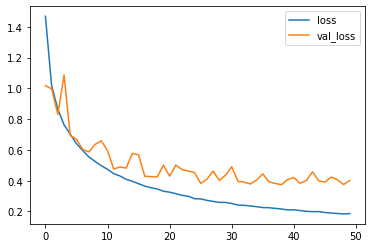

In [0]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

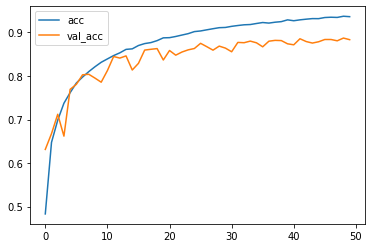

In [0]:
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

Confusion matrix, without normalization
[[887   5  37   7   6   2   3   5  38  10]
 [  5 958   0   1   0   0   0   0  15  21]
 [ 26   0 823  30  36  20  33  23   7   2]
 [  9   3  29 752  42  71  51  25  10   8]
 [  3   1  24  26 894  12  18  17   5   0]
 [  6   3  17 101  23 807  15  20   3   5]
 [  6   2  11  18  17   6 930   5   5   0]
 [  6   1   5   9  24  25   3 919   3   5]
 [ 23   9   4   4   1   1   1   0 952   5]
 [ 16  43   0   2   1   1   2   3  19 913]]


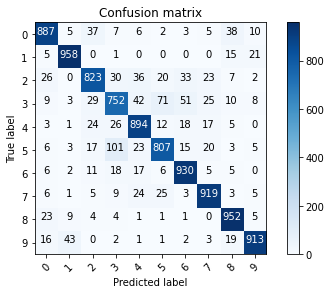

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

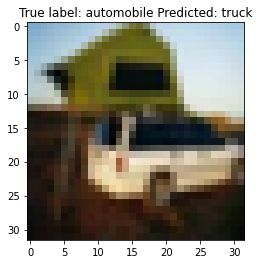

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != test_labels)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(test_images[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[test_labels[i]], labels[p_test[i]]));